Using the Heart Disease Dataset for Training a Heart Disease Predictor Utilizing an ANN

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
diseases=pd.read_csv("Dataset Heart Disease.csv")
diseases.head()

Unnamed: 0  age  sex  chest pain type  resting bps  cholesterol  \
0           0   40    1                2          140        289.0   
1           1   49    0                3          160        180.0   
2           2   37    1                2          130        283.0   
3           3   48    0                4          138        214.0   
4           4   54    1                3          150        195.0   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  oldpeak  \
0                    0            0             172                0      0.0   
1                    0            0             156                0      1.0   
2                    0            1              98                0      0.0   
3                    0            0             108                1      1.5   
4                    0            0             122                0      0.0   

   ST slope  target  
0         1       0  
1         2       1  
2         1       0  
3         2       1  
4         1       0

In [5]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


In [6]:
diseases.drop('Unnamed: 0',axis=1,inplace=True)
diseases

age  sex  chest pain type  resting bps  cholesterol  \
0      40    1                2          140        289.0   
1      49    0                3          160        180.0   
2      37    1                2          130        283.0   
3      48    0                4          138        214.0   
4      54    1                3          150        195.0   
...   ...  ...              ...          ...          ...   
1043   68    0                3          120        211.0   
1044   44    0                3          108        141.0   
1045   52    1                1          128        255.0   
1046   59    1                4          160        273.0   
1047   54    1                1          120        188.0   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1043                    0            0             115                0   
1044                    0            1             175                0   
1045                    0            1             161                1   
1046                    0            0             125                0   
1047                    0            1             113                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1043      1.5         1       1  
1044      0.6         1       1  
1045      0.0         2       0  
1046      0.0         2       0  
1047      1.4         1       0  

[1048 rows x 12 columns]

In [7]:
y = diseases['target']
x = diseases.drop('target',axis=1)

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Dense(256, input_shape=(11,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),  
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

In [11]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/100
24/24 [==============================] - 3s 26ms/step - loss: 2.8135 - accuracy: 0.5995 - val_loss: 2.4054 - val_accuracy: 0.6905
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 2.1146 - accuracy: 0.7308 - val_loss: 1.8373 - val_accuracy: 0.7976
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 1.6450 - accuracy: 0.7586 - val_loss: 1.4711 - val_accuracy: 0.7500
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 1.3537 - accuracy: 0.7639 - val_loss: 1.2254 - val_accuracy: 0.7619
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 1.1137 - accuracy: 0.7785 - val_loss: 1.0574 - val_accuracy: 0.7381
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.9561 - accuracy: 0.7931 - val_loss: 0.9239 - val_accuracy: 0.7500
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.8586 - accuracy: 0.7931 - val_loss: 0.8534 - val_accuracy: 0.7500
Epoch 8/100


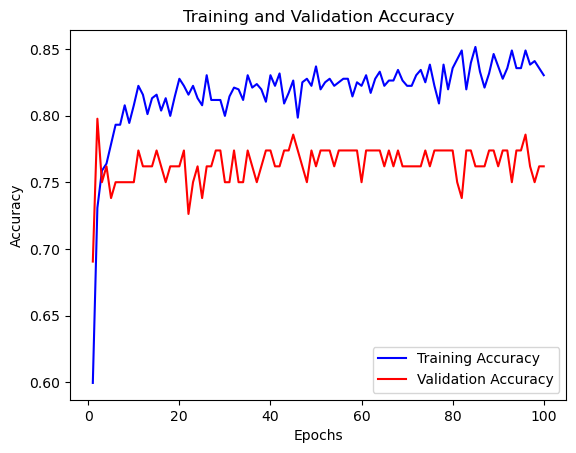

In [12]:
import matplotlib.pyplot as plt

# Train the model and store history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy values
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_pred_flat = np.ravel(y_pred)
y_test_flat = np.ravel(y_test)
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)

print("Confusion Matrix:")
print(conf_matrix)

7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
[[76 28]
 [18 88]]


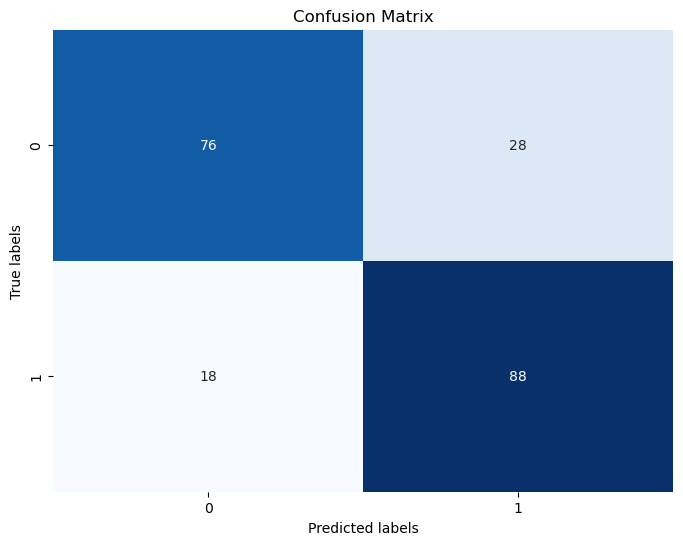

In [15]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()